In [1]:
import pandas as pd

In [2]:
df_male = pd.read_csv("USAMale_names.csv").drop(columns=['Unnamed: 0'])
df_female = pd.read_csv("USAFemale_names.csv").drop(columns=['Unnamed: 0'])

In [3]:
df_male.head()

,state,gender,year,name,number
0,AK,M,1910,Robert,6
1,AK,M,1910,William,5
2,AK,M,1914,Henry,9
3,AK,M,1914,William,9
4,AK,M,1914,David,8


In [4]:
df_merged = pd.concat([df_male, df_female], ignore_index=True)
df_merged.head()

,state,gender,year,name,number
0,AK,M,1910,Robert,6
1,AK,M,1910,William,5
2,AK,M,1914,Henry,9
3,AK,M,1914,William,9
4,AK,M,1914,David,8


In [5]:
#df_merged.to_csv("USA_names.csv")

In [6]:
# Checking for missing values in the merged DataFrame
missing_values = df_merged.isnull().sum()
missing_values

state     0
gender    0
year      0
name      0
number    0
dtype: int64

In [7]:
# Checking the data types of each column in the merged DataFrame
column_data_types = df_merged.dtypes
column_data_types

state     object
gender    object
year       int64
name      object
number     int64
dtype: object

In [8]:
# Converting 'state', 'name', and 'gender' columns to category data type
df_merged['state'] = df_merged['state'].astype('category')
df_merged['name'] = df_merged['name'].astype('category')
df_merged['gender'] = df_merged['gender'].astype('category')
# Checking the updated data types
updated_data_types = df_merged.dtypes
updated_data_types

state     category
gender    category
year         int64
name      category
number       int64
dtype: object

In [9]:
# Filtering the data for California (CA)
df_ca = df_merged[df_merged['state'] == 'CA']
# 1. Name Popularity Trends in California
# Selecting a specific name for demonstration, e.g., 'Michael'
df_michael_ca = df_ca[df_ca['name'] == 'Michael']
popularity_trend_michael = df_michael_ca.pivot_table(index='year', columns='gender', values='number', aggfunc='sum').fillna(0)
# 2. Gender Distribution in California
gender_distribution_ca = df_ca.groupby(['year', 'gender'])['number'].sum().unstack().fillna(0)
# 3. Top Names in California
# Aggregating the number of births for each name and gender
top_names_ca = df_ca.groupby(['name', 'gender'])['number'].sum().reset_index()
top_names_ca = top_names_ca.sort_values(by='number', ascending=False).head(10)
# 4. Name Diversity in California
name_diversity_ca = df_ca.groupby('year')['name'].nunique()
# Displaying the results
#popularity_trend_michael, gender_distribution_ca.head(), top_names_ca, name_diversity_ca.head()

In [10]:
# Importing Plotly for interactive visualizations
import plotly.express as px
# 1. Name Popularity Trends in California for 'Michael'
fig1 = px.line(popularity_trend_michael.reset_index(), x='year', y=['F', 'M'], title='Popularity Trend of the Name "Michael" in California', labels={'value': 'Number of Babies', 'variable': 'Gender', 'year': 'Year'})
fig1.update_layout(xaxis_title='Year', yaxis_title='Number of Babies Named Michael')
# 2. Gender Distribution in California
gender_distribution_ca_melted = gender_distribution_ca.reset_index().melt(id_vars='year', value_vars=['F', 'M'], var_name='gender', value_name='count')
fig2 = px.area(gender_distribution_ca_melted, x='year', y='count', color='gender', title='Gender Distribution of Babies Born in California')
fig2.update_layout(xaxis_title='Year', yaxis_title='Number of Babies Born')
# 3. Top Names in California
fig3 = px.bar(top_names_ca, x='name', y='number', color='gender', title='Top Baby Names in California', text='number')
fig3.update_layout(xaxis_title='Name', yaxis_title='Total Number of Babies Named')
# 4. Name Diversity in California
fig4 = px.line(name_diversity_ca.reset_index(), x='year', y='name', title='Name Diversity in California Over the Years')
fig4.update_layout(xaxis_title='Year', yaxis_title='Number of Unique Names')
# Displaying the plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()

In [11]:
# Removing the Gender Distribution in California plot
# Displaying only the remaining three plots
fig1.show()
fig3.show()
fig4.show()

In [12]:
# Correcting the approach to find gender-neutral names
# We will consider names that have a significant number of both male and female occurrences
gender_neutral_names = df_merged.groupby(['name', 'gender'])['number'].sum().unstack().fillna(0)
gender_neutral_names['total'] = gender_neutral_names['F'] + gender_neutral_names['M']
# Filtering names that have at least 1000 occurrences for both genders and sorting by total occurrences
gender_neutral_names = gender_neutral_names[(gender_neutral_names['F'] >= 1000) & (gender_neutral_names['M'] >= 1000)]
gender_neutral_names = gender_neutral_names.sort_values(by='total', ascending=False).head(10)
# Plotting the top 10 gender-neutral names based on total occurrences
fig7 = px.bar(gender_neutral_names.reset_index(), x='name', y='total', title='Top 10 Gender-Neutral Names Based on Total Occurrences', text='total')
fig7.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig7.update_layout(xaxis_title='Name', yaxis_title='Total Occurrences', uniformtext_minsize=8, uniformtext_mode='hide')
# Displaying the plot
fig7.show()

In [13]:
# State-Specific Name Preferences for 'Michael'
df_michael = df_merged[df_merged['name'] == 'Michael']
state_specific_michael = df_michael.groupby(['state', 'year'])['number'].sum().reset_index()
# Plotting the popularity of 'Michael' across different states over the years
fig9 = px.choropleth(state_specific_michael, locations='state', color='number', hover_name='state', locationmode='USA-states', animation_frame='year', color_continuous_scale='Viridis', scope='usa', title='Popularity of the Name "Michael" Across States Over the Years')
fig9.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'), plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# Displaying the plot
fig9.show()

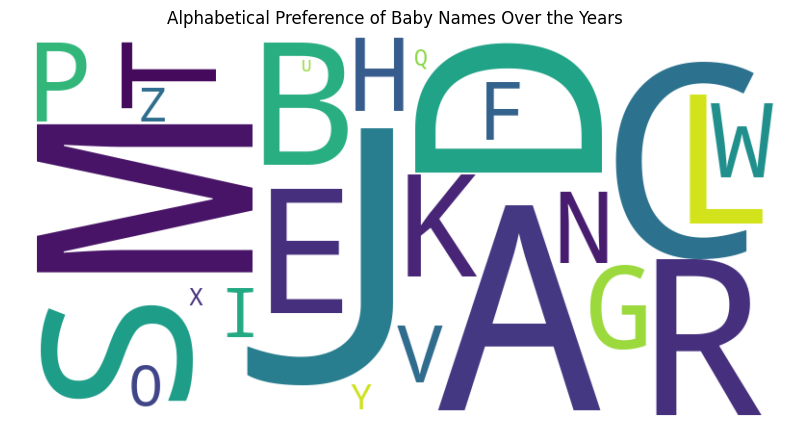

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the first letter of each name and store it in a new column 'first_letter'
df_merged['first_letter'] = df_merged['name'].str[0]

# Group data by the first letter of names and sum the number of babies
alphabetical_data = df_merged.groupby('first_letter')['number'].sum().reset_index()

# Create a dictionary with letters as keys and the number of babies as values
letters_frequency = dict(zip(alphabetical_data['first_letter'], alphabetical_data['number']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(letters_frequency)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Alphabetical Preference of Baby Names Over the Years')
plt.show()


In [15]:
import plotly.express as px

# Group data by the first letter of names and sum the number of babies
alphabetical_data = df_merged.groupby('first_letter')['number'].sum().reset_index()

# Create a bar plot to visualize alphabetical preference
fig = px.bar(alphabetical_data, x='first_letter', y='number', title='Alphabetical Preference of Baby Names Over the Years')
fig.update_xaxes(title='Starting Letter of Name')
fig.update_yaxes(title='Total Number of Babies')
fig.show()